📥 Downloading test_predictions.csv from GitHub...
✅ test_predictions.csv downloaded successfully!
✅ Loaded Predictions Data! Shape: (5675, 5)
📥 Downloading label_encoder.pkl from GitHub...
✅ label_encoder.pkl downloaded successfully!


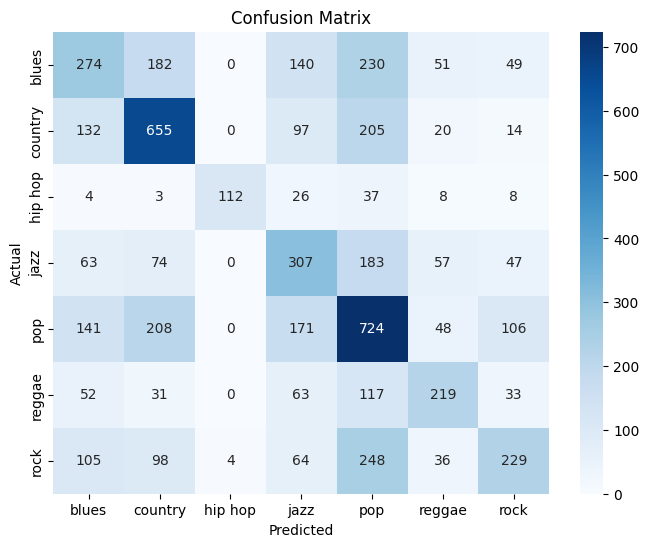

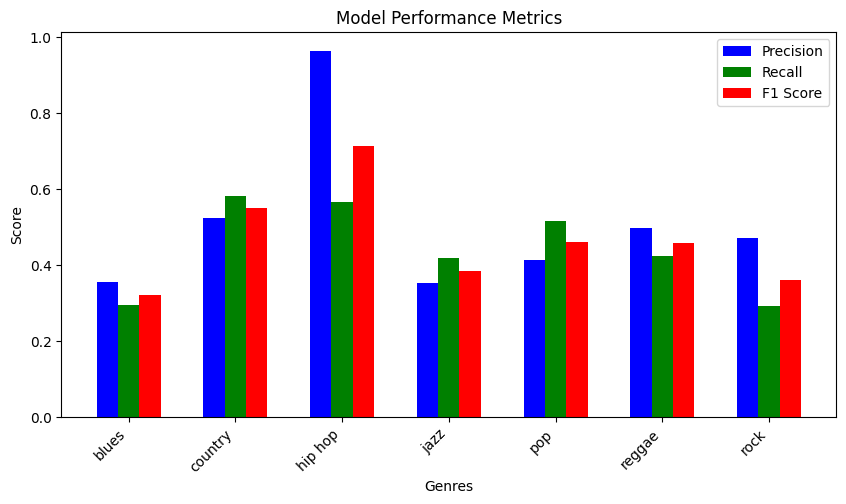

In [5]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import requests
from sklearn.metrics import classification_report, confusion_matrix

# GitHub URL for test_predictions.csv
GITHUB_PREDICTIONS_URL = "https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/test_predictions.csv"
TEST_PREDICTIONS_PATH = "test_predictions.csv"

# Download test_predictions.csv if not found locally
def download_file(url, filename):
    """Downloads a file from a given URL if it doesn't exist locally."""
    if not os.path.exists(filename):
        print(f"📥 Downloading {filename} from GitHub...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, "wb") as f:
                f.write(response.content)
            print(f"✅ {filename} downloaded successfully!")
        else:
            raise FileNotFoundError(f"❌ Failed to download {filename}")
    else:
        print(f"✅ {filename} already exists locally.")

# Ensure test_predictions.csv is available
download_file(GITHUB_PREDICTIONS_URL, TEST_PREDICTIONS_PATH)

# Load Predictions File
df_test = pd.read_csv(TEST_PREDICTIONS_PATH)
print(f"✅ Loaded Predictions Data! Shape: {df_test.shape}")

# GitHub URL for label_encoder.pkl
GITHUB_LABEL_ENCODER_URL = "https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/label_encoder.pkl"
LABEL_ENCODER_PATH = "label_encoder.pkl"

# Download label_encoder.pkl if not found locally
download_file(GITHUB_LABEL_ENCODER_URL, LABEL_ENCODER_PATH)

# Load Label Encoder
label_encoder = joblib.load(LABEL_ENCODER_PATH)

# Ensure required columns exist
if "true_label" not in df_test.columns or "predicted_label" not in df_test.columns:
    raise ValueError("❌ ERROR: Missing 'true_label' or 'predicted_label' in the dataset!")

# Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

plot_confusion_matrix(df_test["true_label"], df_test["predicted_label"], label_encoder.classes_)

# Precision, Recall, F1-score Visualization
def plot_classification_metrics(y_true, y_pred, classes):
    report = classification_report(y_true, y_pred, target_names=classes, output_dict=True)

    precision = [report[cls]["precision"] for cls in classes]
    recall = [report[cls]["recall"] for cls in classes]
    f1_score = [report[cls]["f1-score"] for cls in classes]

    x = np.arange(len(classes))

    plt.figure(figsize=(10, 5))
    plt.bar(x - 0.2, precision, width=0.2, label="Precision", color="b")
    plt.bar(x, recall, width=0.2, label="Recall", color="g")
    plt.bar(x + 0.2, f1_score, width=0.2, label="F1 Score", color="r")

    plt.xticks(ticks=x, labels=classes, rotation=45, ha="right")
    plt.xlabel("Genres")
    plt.ylabel("Score")
    plt.title("Model Performance Metrics")
    plt.legend()
    plt.show()

plot_classification_metrics(df_test["true_label"], df_test["predicted_label"], label_encoder.classes_)


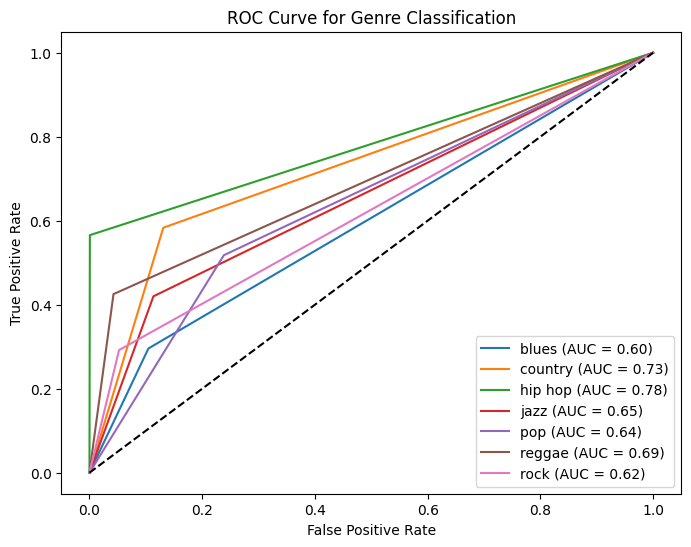

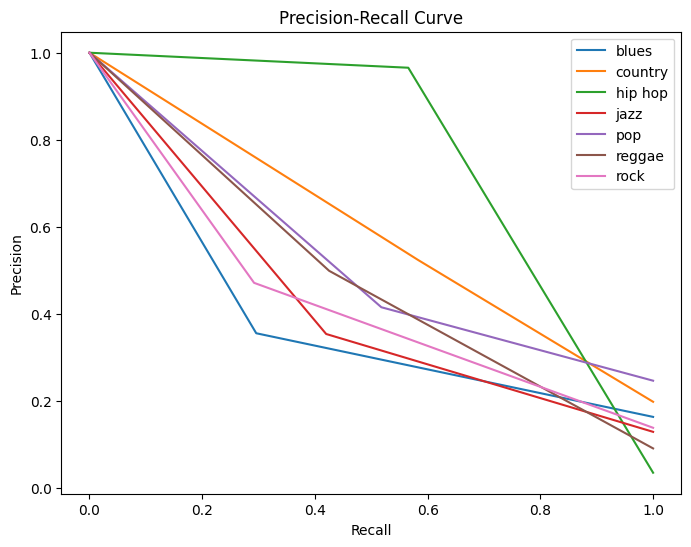

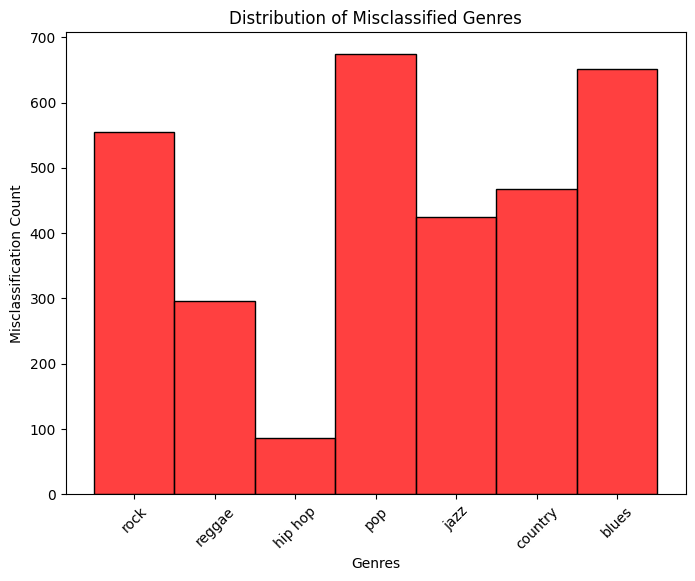

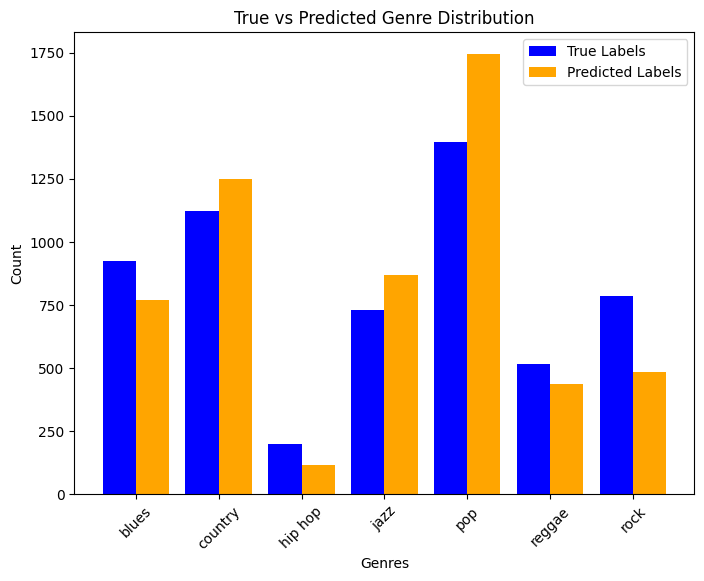

📥 Downloading training_logs.csv...
❌ No training logs found. Skipping loss visualization.
✅ All visualizations generated successfully!


In [6]:
import os
import requests
import numpy as np
import pandas as pd
import joblib
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve
)
from sklearn.preprocessing import label_binarize
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define Paths for Predictions and Labels
GITHUB_PREDICTIONS_URL = "https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/test_predictions.csv"
GITHUB_LABEL_ENCODER_URL = "https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/label_encoder.pkl"

PREDICTIONS_PATH = "test_predictions.csv"
LABEL_ENCODER_PATH = "label_encoder.pkl"

# Function to Download Files
def download_file(url, filename):
    if not os.path.exists(filename):
        print(f"📥 Downloading {filename}...")
        response = requests.get(url)
        if response.status_code == 200:
            with open(filename, "wb") as f:
                f.write(response.content)
            print(f"✅ {filename} downloaded successfully!")
        else:
            raise FileNotFoundError(f"❌ Failed to download {filename}")

# Download Required Files
download_file(GITHUB_PREDICTIONS_URL, PREDICTIONS_PATH)
download_file(GITHUB_LABEL_ENCODER_URL, LABEL_ENCODER_PATH)

# Load Predictions and Label Encoder
df_test = pd.read_csv(PREDICTIONS_PATH)
label_encoder = joblib.load(LABEL_ENCODER_PATH)

# Ensure necessary columns exist
if "true_label" not in df_test.columns or "predicted_label" not in df_test.columns:
    raise KeyError("❌ ERROR: Required columns 'true_label' and 'predicted_label' are missing!")

true_labels = df_test["true_label"]
predicted_labels = df_test["predicted_label"]
genres = label_encoder.classes_

# Plot ROC Curve
def plot_roc_curve(true_labels, predicted_labels, genres):
    y_true_bin = label_binarize(true_labels, classes=np.arange(len(genres)))
    y_pred_bin = label_binarize(predicted_labels, classes=np.arange(len(genres)))

    plt.figure(figsize=(8, 6))
    for i, genre in enumerate(genres):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_bin[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{genre} (AUC = {roc_auc:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for Genre Classification")
    plt.legend()
    plt.show()

plot_roc_curve(true_labels, predicted_labels, genres)

# Plot Precision-Recall Curve
def plot_precision_recall(true_labels, predicted_labels, genres):
    y_true_bin = label_binarize(true_labels, classes=np.arange(len(genres)))
    y_pred_bin = label_binarize(predicted_labels, classes=np.arange(len(genres)))

    plt.figure(figsize=(8, 6))
    for i, genre in enumerate(genres):
        precision, recall, _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])
        plt.plot(recall, precision, label=f"{genre}")

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()
    plt.show()

plot_precision_recall(true_labels, predicted_labels, genres)

# Plot Error Distribution
def plot_error_distribution(true_labels, predicted_labels, genres):
    misclassified = true_labels != predicted_labels
    misclassified_genres = [genres[i] for i in true_labels[misclassified]]

    plt.figure(figsize=(8, 6))
    sns.histplot(misclassified_genres, bins=len(genres), kde=False, color="red")
    plt.xlabel("Genres")
    plt.ylabel("Misclassification Count")
    plt.xticks(rotation=45)
    plt.title("Distribution of Misclassified Genres")
    plt.show()

plot_error_distribution(true_labels, predicted_labels, genres)

# Plot Genre Distribution in Predictions
def plot_genre_distribution(true_labels, predicted_labels, genres):
    true_genre_counts = [np.sum(true_labels == i) for i in range(len(genres))]
    predicted_genre_counts = [np.sum(predicted_labels == i) for i in range(len(genres))]

    x = np.arange(len(genres))
    width = 0.4

    plt.figure(figsize=(8, 6))
    plt.bar(x - width / 2, true_genre_counts, width, label="True Labels", color="blue")
    plt.bar(x + width / 2, predicted_genre_counts, width, label="Predicted Labels", color="orange")

    plt.xlabel("Genres")
    plt.ylabel("Count")
    plt.xticks(ticks=x, labels=genres, rotation=45)
    plt.title("True vs Predicted Genre Distribution")
    plt.legend()
    plt.show()

plot_genre_distribution(true_labels, predicted_labels, genres)

# Plot Training Loss & Validation Loss (if available)
TRAINING_LOGS_URL = "https://raw.githubusercontent.com/rixprakash/Jarheads/main/Project%201/OUTPUT/training_logs.csv"
TRAINING_LOGS_PATH = "training_logs.csv"

try:
    download_file(TRAINING_LOGS_URL, TRAINING_LOGS_PATH)
    df_logs = pd.read_csv(TRAINING_LOGS_PATH)

    plt.figure(figsize=(8, 6))
    plt.plot(df_logs["epoch"], df_logs["train_loss"], label="Training Loss", marker="o")
    plt.plot(df_logs["epoch"], df_logs["val_loss"], label="Validation Loss", marker="s")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training vs Validation Loss")
    plt.legend()
    plt.show()
except:
    print("❌ No training logs found. Skipping loss visualization.")

print("✅ All visualizations generated successfully!")
